/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wmalik/Documents/MSc/

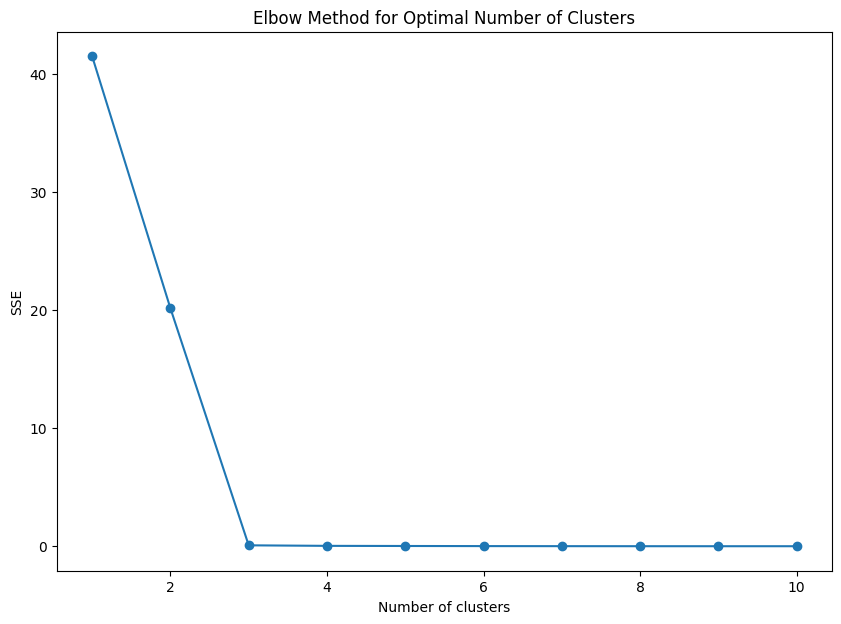

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score


df = pd.read_csv('normalized_investor_uuid_org_country_code_sums.csv')

# Extract the features for clustering
features = df.drop(columns=['investor_uuid'])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_transformed)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()



/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.9999778277862873
Davies-Bouldin Score: 0.032176281840897734


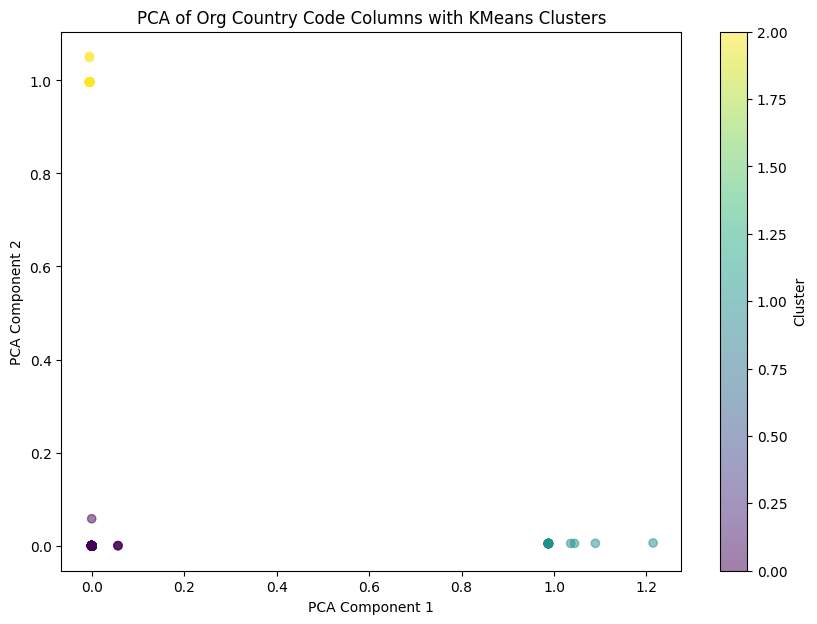

In [55]:
# Run KMeans clustering with the optimal number of clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(pca_transformed)

# Add the cluster labels to the DataFrame
df['cluster'] = clusters

# Evaluate the clustering result using silhouette score and Davies-Bouldin score
silhouette_avg = silhouette_score(pca_transformed, clusters)
davies_bouldin_avg = davies_bouldin_score(pca_transformed, clusters)
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Score: {davies_bouldin_avg}')

# Plot the clustering result
plt.figure(figsize=(10, 7))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Org Country Code Columns with KMeans Clusters')
plt.colorbar(label='Cluster')
plt.show()